In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sp
import ast
import math

In [80]:
testFS = "./src/testFS.txt"
testMSE = "./src/testMSE.txt"

samples = [10, 20]
repetitions = [0,1,2,3,4]
filenameDic = {}
for l in samples:
    for r in repetitions:
        filenameDic[f"{l}samples,{r}"] = (f"./src/{l}samples_repetition{r}_testMSE.txt",
                                  f"./src/{l}samples_repetition{r}_testFS.txt")

        
levels = [20,40,60,80]
repetitions = [0,1,2,3,4]
for l in levels:
    for r in repetitions:
        filenameDic[f"{l}%,{r}"] = (f"./src/{l}percent_repetition{r}_testMSE.txt",
                                  f"./src/{l}percent_repetition{r}_testFS.txt")
        
print(filenameDic.keys())

        

def readFiles(filename):

    with open(filename, 'r') as file:
        string = file.read()

    return np.array(ast.literal_eval(string))



dict_keys(['10samples,0', '10samples,1', '10samples,2', '10samples,3', '10samples,4', '20samples,0', '20samples,1', '20samples,2', '20samples,3', '20samples,4', '20%,0', '20%,1', '20%,2', '20%,3', '20%,4', '40%,0', '40%,1', '40%,2', '40%,3', '40%,4', '60%,0', '60%,1', '60%,2', '60%,3', '60%,4', '80%,0', '80%,1', '80%,2', '80%,3', '80%,4'])


In [81]:
standardMSE = readFiles(testMSE)
standardFS = readFiles(testFS)

MSEresults = []
FSresults = []
labels = []

for key, value in filenameDic.items():
        labels.append(key)
        MSEresults.append(readFiles(filenameDic[key][0]))
        FSresults.append(readFiles(filenameDic[key][1]))


MSEresults = pd.DataFrame(MSEresults)
# FSresults = pd.DataFrame(FSresults)
print(labels)

['10samples,0', '10samples,1', '10samples,2', '10samples,3', '10samples,4', '20samples,0', '20samples,1', '20samples,2', '20samples,3', '20samples,4', '20%,0', '20%,1', '20%,2', '20%,3', '20%,4', '40%,0', '40%,1', '40%,2', '40%,3', '40%,4', '60%,0', '60%,1', '60%,2', '60%,3', '60%,4', '80%,0', '80%,1', '80%,2', '80%,3', '80%,4']


In [82]:
print(standardMSE.sum())

0.10964589037841953


In [58]:
data = './data/Lindel_training.txt' 
df = pd.read_csv(data, sep='\t', header=None)
df = df.iloc[:,3034:]

df['nozeros'] = 557 - (df == 0).sum(axis=1)

df['nozeros'].mean()

24.254942528735633

## Histogram

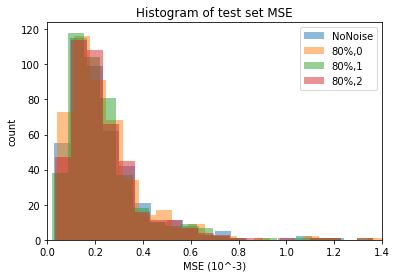

In [96]:
def scale(data):
    return data*1000

standardMSEScaled = scale(standardMSE)

n = math.ceil((standardMSEScaled.max() - standardMSEScaled.min())/0.07)
plt.hist(standardMSEScaled, bins=n,alpha=0.5, label="NoNoise")
# i = 2

# plt.hist(scale(MSEresults.iloc[10]),bins=n,alpha=0.5, label=labels[10])
# plt.hist(scale(MSEresults.iloc[11]),bins=n,alpha=0.5, label=labels[11])
# plt.hist(scale(MSEresults.iloc[12]),bins=n,alpha=0.5, label=labels[12])

plt.hist(scale(MSEresults.iloc[25]),bins=n,alpha=0.5, label=labels[25])
plt.hist(scale(MSEresults.iloc[26]),bins=n,alpha=0.5, label=labels[26])
plt.hist(scale(MSEresults.iloc[27]),bins=n,alpha=0.5, label=labels[27])



plt.title("Histogram of test set MSE")
plt.ylabel("count")
plt.xlabel("MSE (10^-3)")
plt.legend()
plt.xlim([0, 1.4])
plt.show()

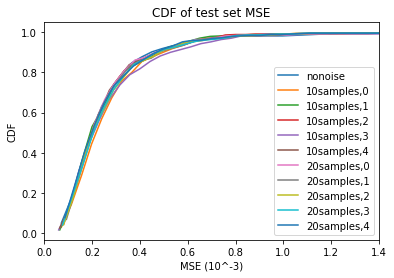

In [97]:
def generateCDF(data, label):
    count, bins_count = np.histogram(data, bins=40)

    pdf = count / sum(count)
    pdf2 = count

    # using numpy np.cumsum to calculate the CDF
    cdf = np.cumsum(pdf)
  
    # plotting CDF
    plt.plot(bins_count[1:], cdf, label=label)
    plt.title("CDF of test set MSE")
    plt.ylabel("CDF")
    plt.xlabel("MSE (10^-3)")
    plt.xlim([0, 1.4])
    plt.legend()
    
generateCDF(standardMSEScaled, "nonoise")
for i in range(0,10):
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

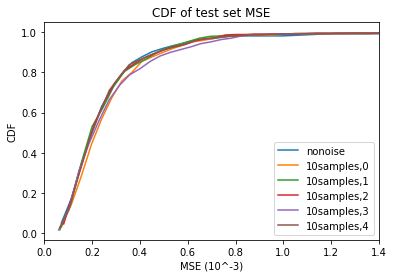

In [98]:
generateCDF(standardMSEScaled, "nonoise")
for i in range(0,5,1):
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

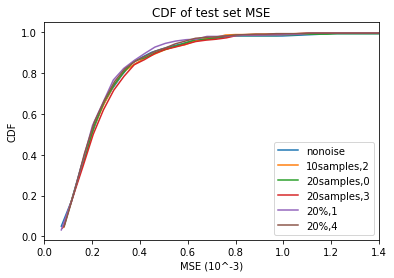

In [99]:
generateCDF(standardMSEScaled, "nonoise")
for i in range(2,15,3):
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

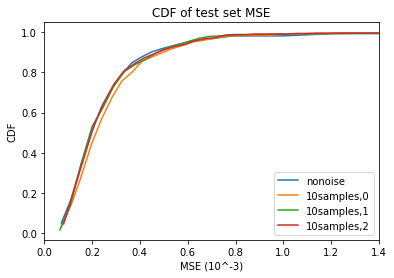

In [100]:
generateCDF(standardMSEScaled, "nonoise")
for i in range(0,3,1):
    i = i
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

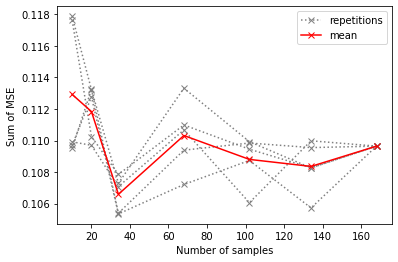

In [101]:
noise = [10,20,34,68,102,134,168]
lst = []
lst2 = []
lst3 = []
lst4 = []
lst5 = []
lstMean = []

for i in range(0,30,5):
    lst.append(MSEresults.iloc[i].sum())
    lst2.append(MSEresults.iloc[i+1].sum())
    lst3.append(MSEresults.iloc[i+2].sum())
    lst4.append(MSEresults.iloc[i+3].sum())
    lst5.append(MSEresults.iloc[i+4].sum())
    lstMean.append(np.mean([MSEresults.iloc[i].sum(),MSEresults.iloc[i+1].sum(),
                        MSEresults.iloc[i+2].sum(),MSEresults.iloc[i+3].sum(),MSEresults.iloc[i+4].sum()]))
    
    
lst.append(standardMSE.sum())
lst2.append(standardMSE.sum())
lst3.append(standardMSE.sum())
lst4.append(standardMSE.sum())
lst5.append(standardMSE.sum())
lstMean.append(standardMSE.sum())
    
fig, ax = plt.subplots()
ax.plot(noise,lst, '-x',color='grey',linestyle=':')
ax.plot(noise,lst2, '-x',color='grey',linestyle=':')
ax.plot(noise,lst3, '-x',color='grey',linestyle=':')
ax.plot(noise,lst4, '-x',color='grey',linestyle=':')
ax.plot(noise,lst5, '-x', label='repetitions',color='grey',linestyle=':')
ax.plot(noise,lstMean, '-x', label='mean',color='red')

plt.ylabel("Sum of MSE")
plt.xlabel("Number of samples")
plt.legend()
plt.show()

## Scatterplot (figure 6E)

In [102]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import mean_squared_error


def generateScatterplot(data,title):
    measured, predicted = data[:,0], data[:,1]

    # Calculationg pearson r
    pearsonr = sp.pearsonr(measured,predicted)[0]

    # Calculation of Mean Squared Error (MSE)
    MSE = mean_squared_error(measured,predicted)

    #Plot measured vs. predicted frameshift ratio
    fig, ax = plt.subplots()
    ax.scatter(measured,predicted, c='skyblue',s=6)
    ax.set_xlim((0,1.05))
    ax.set_ylim((0,1.05))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    line = mlines.Line2D([0.1, 1], [0.1, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    ax.text(0.01, 0.95,"pearson r: " + str(round(pearsonr,4)),
         horizontalalignment='left',
         verticalalignment='center',
         transform = ax.transAxes)
    ax.text(0.01, 0.85,"MSE: " + str(round(MSE,4)),
         horizontalalignment='left',
         verticalalignment='center',
         transform = ax.transAxes)
    plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("Predicted frameshift ratio",fontsize=14)
    plt.xlabel("Measured frameshift ratio",fontsize=14)
    plt.show()

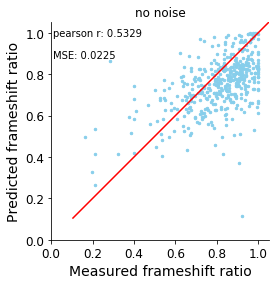

In [103]:
generateScatterplot(standardFS,"no noise")

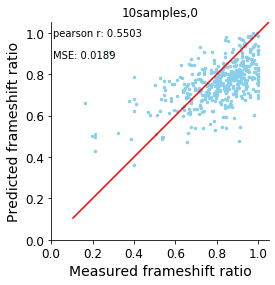

In [108]:
generateScatterplot(FSresults[0], labels[0])

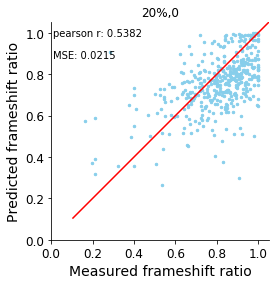

In [109]:
generateScatterplot(FSresults[10],labels[10])

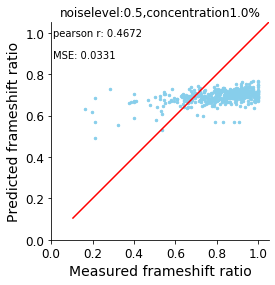

In [92]:
generateScatterplot(FSresults[14],labels[14])

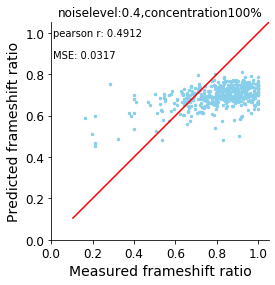

In [70]:
generateScatterplot(FSresults[9],labels[9])

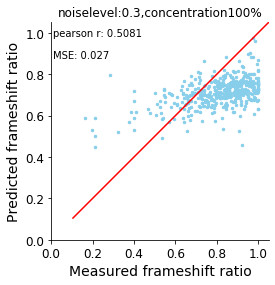

In [79]:
generateScatterplot(FSresults[6],labels[6])

In [31]:
def computevalues(data):
    measured, predicted = data[:,0], data[:,1]
    # Calculationg pearson r
    pearsonr = sp.pearsonr(measured,predicted)[0]

    # Calculation of Mean Squared Error (MSE)
    MSE = mean_squared_error(measured,predicted)
    
    return (pearsonr, MSE)

lst = []
lst.append(computevalues(standardFS))

for i in range(0,13,3):
    i = i
    lst.append(computevalues(FSresults[i]))
    
print(lst)

[(0.5328956929266447, 0.022450787472548934), (0.5102914663040102, 0.022790300756614684), (0.5297569142086118, 0.026252612404238727), (0.5081262859894222, 0.02702040751125052), (0.49117968402212514, 0.031710032017372554), (0.46881105985083665, 0.032572326283358835)]


6
6


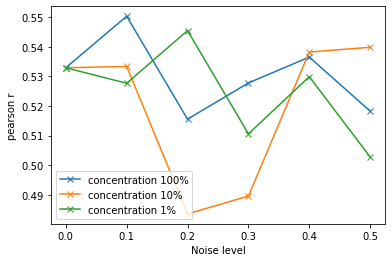

In [112]:
def computepearson(data):
    measured, predicted = data[:,0], data[:,1]
    # Calculationg pearson r
    pearsonr = sp.pearsonr(measured,predicted)[0]
    MSE = mean_squared_error(measured,predicted)

    return pearsonr

noise = [0] + [0.1,0.2,0.3,0.4,0.5]
lst = [computepearson(standardFS)]
lst2 = [computepearson(standardFS)]
lst3 = [computepearson(standardFS)]
for i in range(0,15,3):
    lst.append(computepearson(FSresults[i]))
    lst2.append(computepearson(FSresults[i+1]))
    lst3.append(computepearson(FSresults[i+2]))
    
print(len(noise))
print(len(lst))
fig, ax = plt.subplots()
ax.plot(noise,lst, '-x', label='concentration 100%')
ax.plot(noise,lst2, '-x', label='concentration 10%')
ax.plot(noise,lst3, '-x', label='concentration 1%')
plt.ylabel("pearson r")
plt.xlabel("Noise level")
plt.legend()
plt.show()

['10samples,0', '10samples,1', '10samples,2', '10samples,3', '10samples,4', '20samples,0', '20samples,1', '20samples,2', '20samples,3', '20samples,4', '20%,0', '20%,1', '20%,2', '20%,3', '20%,4', '40%,0', '40%,1', '40%,2', '40%,3', '40%,4', '60%,0', '60%,1', '60%,2', '60%,3', '60%,4', '80%,0', '80%,1', '80%,2', '80%,3', '80%,4']


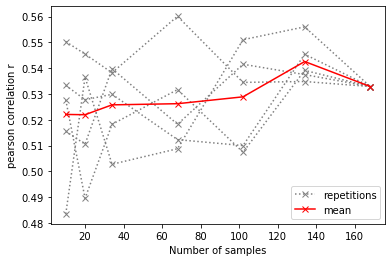

In [118]:
noise = [10,20,34,68,102,134,168]
lst = []
lst2 = []
lst3 = []
lst4 = []
lst5 = []
lstMean = []
print(labels)

for i in range(0,30,5):
    lst.append(computepearson(FSresults[i]))
    lst2.append(computepearson(FSresults[i+1]))
    lst3.append(computepearson(FSresults[i+2]))
    lst4.append(computepearson(FSresults[i+3]))
    lst5.append(computepearson(FSresults[i+4]))

    lstMean.append(np.mean([computepearson(FSresults[i]),computepearson(FSresults[i+1]),
                           computepearson(FSresults[i+2]),computepearson(FSresults[i+3]),
                           computepearson(FSresults[i+4])]))
    
    
lst.append(computepearson(standardFS))
lst2.append(computepearson(standardFS))
lst3.append(computepearson(standardFS))
lst4.append(computepearson(standardFS))
lst5.append(computepearson(standardFS))
lstMean.append(computepearson(standardFS))
    
fig, ax = plt.subplots()
ax.plot(noise,lst, '-x',color='grey',linestyle=':')
ax.plot(noise,lst2, '-x',color='grey',linestyle=':')
ax.plot(noise,lst3, '-x',color='grey',linestyle=':')
ax.plot(noise,lst4, '-x',color='grey',linestyle=':')
ax.plot(noise,lst5, '-x', label='repetitions',color='grey',linestyle=':')
ax.plot(noise,lstMean, '-x', label='mean',color='red')

plt.ylabel("pearson correlation r")
plt.xlabel("Number of samples")
plt.legend()
plt.show()